In [158]:
%load_ext autoreload
%autoreload
%matplotlib inline
import os
import sys
import pickle
import numpy as np
sys.path.insert(0, "..")
import src.analyze_model
import src.satellite_analyze
import imageio
from matplotlib import pyplot as plt
import src.plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [159]:
# build truth output
path = '/app/data/train/labels/'
myfile = 'image_01'
out_true = src.analyze_model.built_out_from_file(path+myfile+ '.txt')
print('true shape', out_true.shape)

true shape (25, 25, 6)


Predicting 247 trees
1
(247, 6)
pred shape (25, 25, 6)


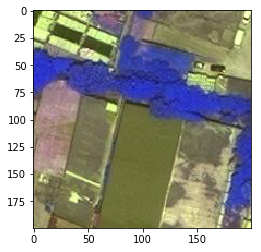

Text(0.5, 1.0, 'Plant detect')

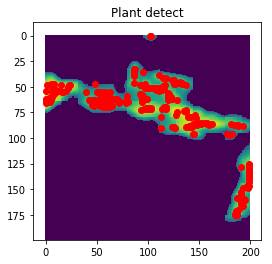

In [160]:
# build pred output
myfile = 'image_01'
path = '/app/data/train/images/'
data = imageio.imread(path+myfile+'.jpg')
# normalize it
data = data.astype('float') / 255.
# try and build an output for the tree data
out_pred = src.models.pixel_detect_model(data)
print('pred shape', out_pred.shape)
# get tree data
plant_data = src.satellite_analyze.get_tree_finder_image(data)
# get peaks
trees_local = src.models.detect_peaks(plant_data)
# plot trees (x and y are switched)
plt.imshow(data)
plt.show()
plt.imshow(plant_data)
plt.scatter(trees_local[:, 1], trees_local[:, 0], color='r')
plt.title('Plant detect')

In [161]:
# Try to calculate the cost
cost, cost_reg = src.analyze_model.cost_function(out_true, out_pred)

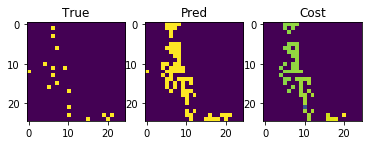

In [162]:
# compare them
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(out_true[:,:,0])
ax1.set_title('True')
ax2.imshow(out_pred[:,:,0])
ax2.set_title('Pred')
ax3.imshow(cost_reg)
ax3.set_title('Cost')
plt.show()